<a href="https://colab.research.google.com/github/HedersonSantos/RegDatChallg/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
#obtendo os arquivos de dados
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv

--2022-03-30 22:49:10--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1397869 (1.3M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]   1.33M  --.-KB/s    in 0.04s   

2022-03-30 22:49:10 (31.9 MB/s) - ‘train.csv.1’ saved [1397869/1397869]

--2022-03-30 22:49:10--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573899 (560K) [text

In [26]:
dfTrain = pd.read_csv('train.csv')
#dfTest = pd.read_csv('test.csv')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [58]:
dfTrain.describe()

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,2940.652499,29.121340,0.006104,0.000044,0.002964,0.003245,0.008893,0.034051,0.311054,0.017160,0.020166,0.027513,0.051478,0.031895,21.691668,0.541286,0.653501,0.219475,0.010223,-0.012633,-0.025192,-0.000963,0.014772,0.008972,-0.007462,-0.016772,-0.000486,-0.005106,-0.018972
std,1699.192364,10.755535,0.005490,0.000035,0.003076,0.003616,0.009229,0.025476,0.227168,0.013016,0.016394,0.019818,0.039049,0.057913,4.283338,0.101635,0.070514,0.089927,1.022667,1.001635,1.000682,1.008123,0.989822,0.996655,0.988960,1.026635,1.000286,0.990513,1.003466
min,1.000000,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,-3.368797,-3.380800,-3.478111,-3.477503,-3.640632,-4.101566,-3.325202,-4.181709,-3.271369,-3.914810,-3.940039
25%,1475.000000,21.371000,0.003600,0.000023,0.001590,0.001830,0.004780,0.019260,0.177000,0.009310,0.010820,0.015620,0.027930,0.011063,19.407000,0.469290,0.597100,0.157740,-0.695530,-0.686830,-0.710558,-0.684078,-0.653262,-0.667845,-0.677333,-0.710010,-0.684800,-0.667930,-0.719007
50%,2946.000000,27.630000,0.004900,0.000035,0.002250,0.002480,0.006760,0.027750,0.255000,0.013770,0.016080,0.022960,0.041300,0.018663,21.915000,0.542300,0.645100,0.206200,0.012535,-0.016551,-0.041247,0.010535,0.019838,0.012707,-0.014778,-0.022363,-0.017580,-0.020160,-0.018618
75%,4415.000000,36.483000,0.006770,0.000053,0.003270,0.003430,0.009800,0.039990,0.366000,0.020690,0.024000,0.032920,0.062070,0.031547,24.476000,0.614110,0.710790,0.264070,0.706236,0.656291,0.660537,0.662715,0.676001,0.678279,0.649582,0.657142,0.643342,0.641950,0.659158
max,5873.000000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.239150,1.970000,0.162670,0.162460,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,4.051689,3.521048,4.089038,3.415772,3.771027,3.904879,3.628111,4.551681,3.833876,3.459594,3.540049


In [27]:
preditoras = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
X = dfTrain[preditoras].values
y = dfTrain['score'].values
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# feature selection
def select_features(X_treino, y_treino, X_teste):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from treinoing data
	fs.fit(X_treino, y_treino)
	# transform treino input data
	X_treino_fs = fs.transform(X_treino)
	# transform teste input data
	X_teste_fs = fs.transform(X_teste)
	return X_treino_fs, X_teste_fs, fs


Feature 0: 0.063798
Feature 1: 0.100205
Feature 2: 0.068547
Feature 3: 0.056937
Feature 4: 0.068334
Feature 5: 0.112935
Feature 6: 0.091503
Feature 7: 0.097467
Feature 8: 0.109189
Feature 9: 0.112547
Feature 10: 0.097131
Feature 11: 0.079581
Feature 12: 0.108480
Feature 13: 0.093662
Feature 14: 0.213416
Feature 15: 0.085451
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.017031
Feature 21: 0.002779
Feature 22: 0.000000
Feature 23: 0.013202
Feature 24: 0.000573
Feature 25: 0.015902
Feature 26: 0.000000


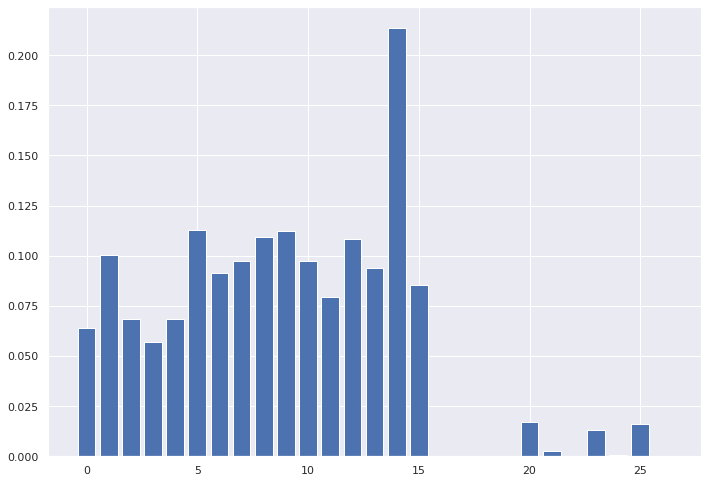

In [29]:
# feature selection
X_treino_fs, X_teste_fs, fs = select_features(X_treino, y_treino, X_teste)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [30]:
#np.argmax(fs.scores_)
importantes = np.argpartition(fs.scores_, -4)[-15:]
n_preditoras = [preditoras[i]  for i in importantes if preditoras[i] not in ['V8','V13','V10','V9']]
#X = dfTrain[n_preditoras].values



In [31]:
def imprimeBoxPlot(dfTrain, n_preditoras:list, title=None):
  if title==None: title='Box Plot'
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(12, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    data = dfTrain[[c]]
    sns.boxplot(data=data, orient='h', ax=ax[j,k]).set_title(c + " - " + title)

def imprimeScatter(dados, n_preditoras, title=None):
  if title==None: title=' '
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(20, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    sns.scatterplot(data=dados, x='score', y=c, ax=ax[j,k]).set_title(c + " - " + title)


In [32]:
#filtrando outliers
dados = dfTrain.copy()
for c in n_preditoras:
  # selecionando segundo o total
  Q1 = dados[c].quantile(0.25)
  Q3 = dados[c].quantile(0.75)
  IQR = Q3 - Q1
  dados = dados[(dados[c] >= Q1 - (IQR*1.5)) & (dados[c] <= Q3 + (IQR*1.5))]
  

In [33]:
#correlação
display(dados[n_preditoras].corr('pearson'))
display(dados[n_preditoras].corr('spearman'))

,V3,V16,V18,V5,V14,V7,V4,V15,V11,V12,V17
V3,1.000000,0.391039,0.761451,0.925238,0.668693,0.925258,0.841927,-0.630342,0.459067,0.480667,0.430873
V16,0.391039,1.000000,0.415454,0.274890,0.451767,0.274831,0.531385,-0.543436,0.316502,0.368144,0.136705
V18,0.761451,0.415454,1.000000,0.637082,0.565554,0.637116,0.696139,-0.636253,0.460422,0.522120,0.394542
V5,0.925238,0.274890,0.637082,1.000000,0.599468,0.999995,0.708529,-0.583989,0.445769,0.414672,0.403009
V14,0.668693,0.451767,0.565554,0.599468,1.000000,0.599428,0.591157,-0.618901,0.471634,0.455423,0.050994
V7,0.925258,0.274831,0.637116,0.999995,0.599428,1.000000,0.708547,-0.583962,0.445734,0.414648,0.403078
V4,0.841927,0.531385,0.696139,0.708529,0.591157,0.708547,1.000000,-0.634251,0.442760,0.476018,0.478986
V15,-0.630342,-0.543436,-0.636253,-0.583989,-0.618901,-0.583962,-0.634251,1.000000,-0.695128,-0.683982,-0.335864
V11,0.459067,0.316502,0.460422,0.445769,0.471634,0.445734,0.442760,-0.695128,1.000000,0.933433,0.235990
V12,0.480667,0.368144,0.522120,0.414672,0.455423,0.414648,0.476018,-0.683982,0.933433,1.000000,0.258797


,V3,V16,V18,V5,V14,V7,V4,V15,V11,V12,V17
V3,1.000000,0.392905,0.772444,0.930293,0.722765,0.930291,0.851705,-0.663632,0.509191,0.522597,0.420603
V16,0.392905,1.000000,0.413541,0.271839,0.470208,0.271771,0.538252,-0.540436,0.316438,0.384386,0.139243
V18,0.772444,0.413541,1.000000,0.670437,0.610336,0.670453,0.706565,-0.653450,0.503602,0.557627,0.382435
V5,0.930293,0.271839,0.670437,1.000000,0.640919,0.999993,0.725549,-0.624851,0.508696,0.474309,0.412058
V14,0.722765,0.470208,0.610336,0.640919,1.000000,0.640865,0.640336,-0.647065,0.490273,0.487933,0.072430
V7,0.930291,0.271771,0.670453,0.999993,0.640865,1.000000,0.725538,-0.624812,0.508708,0.474325,0.412100
V4,0.851705,0.538252,0.706565,0.725549,0.640336,0.725538,1.000000,-0.666855,0.490891,0.529912,0.490353
V15,-0.663632,-0.540436,-0.653450,-0.624851,-0.647065,-0.624812,-0.666855,1.000000,-0.718125,-0.713265,-0.331655
V11,0.509191,0.316438,0.503602,0.508696,0.490273,0.508708,0.490891,-0.718125,1.000000,0.944484,0.252860
V12,0.522597,0.384386,0.557627,0.474309,0.487933,0.474325,0.529912,-0.713265,0.944484,1.000000,0.270185


In [34]:
dados_corr = dados[n_preditoras].corr('pearson')
retirar=[]
analisada = []
for c in dados_corr.columns:
  res = dados_corr[dados_corr[c]>=0.9]
  sai=[]
  for i in res.index.to_list():
    if i in retirar: break
    if i!=c: sai.append(c)
  if len(sai)>0:
    retirar.append(c)

In [35]:
n_preditoras = [c for c in n_preditoras if not c in retirar]

In [36]:
n_preditoras

['V16', 'V18', 'V5', 'V14', 'V7', 'V4', 'V15', 'V12', 'V17']

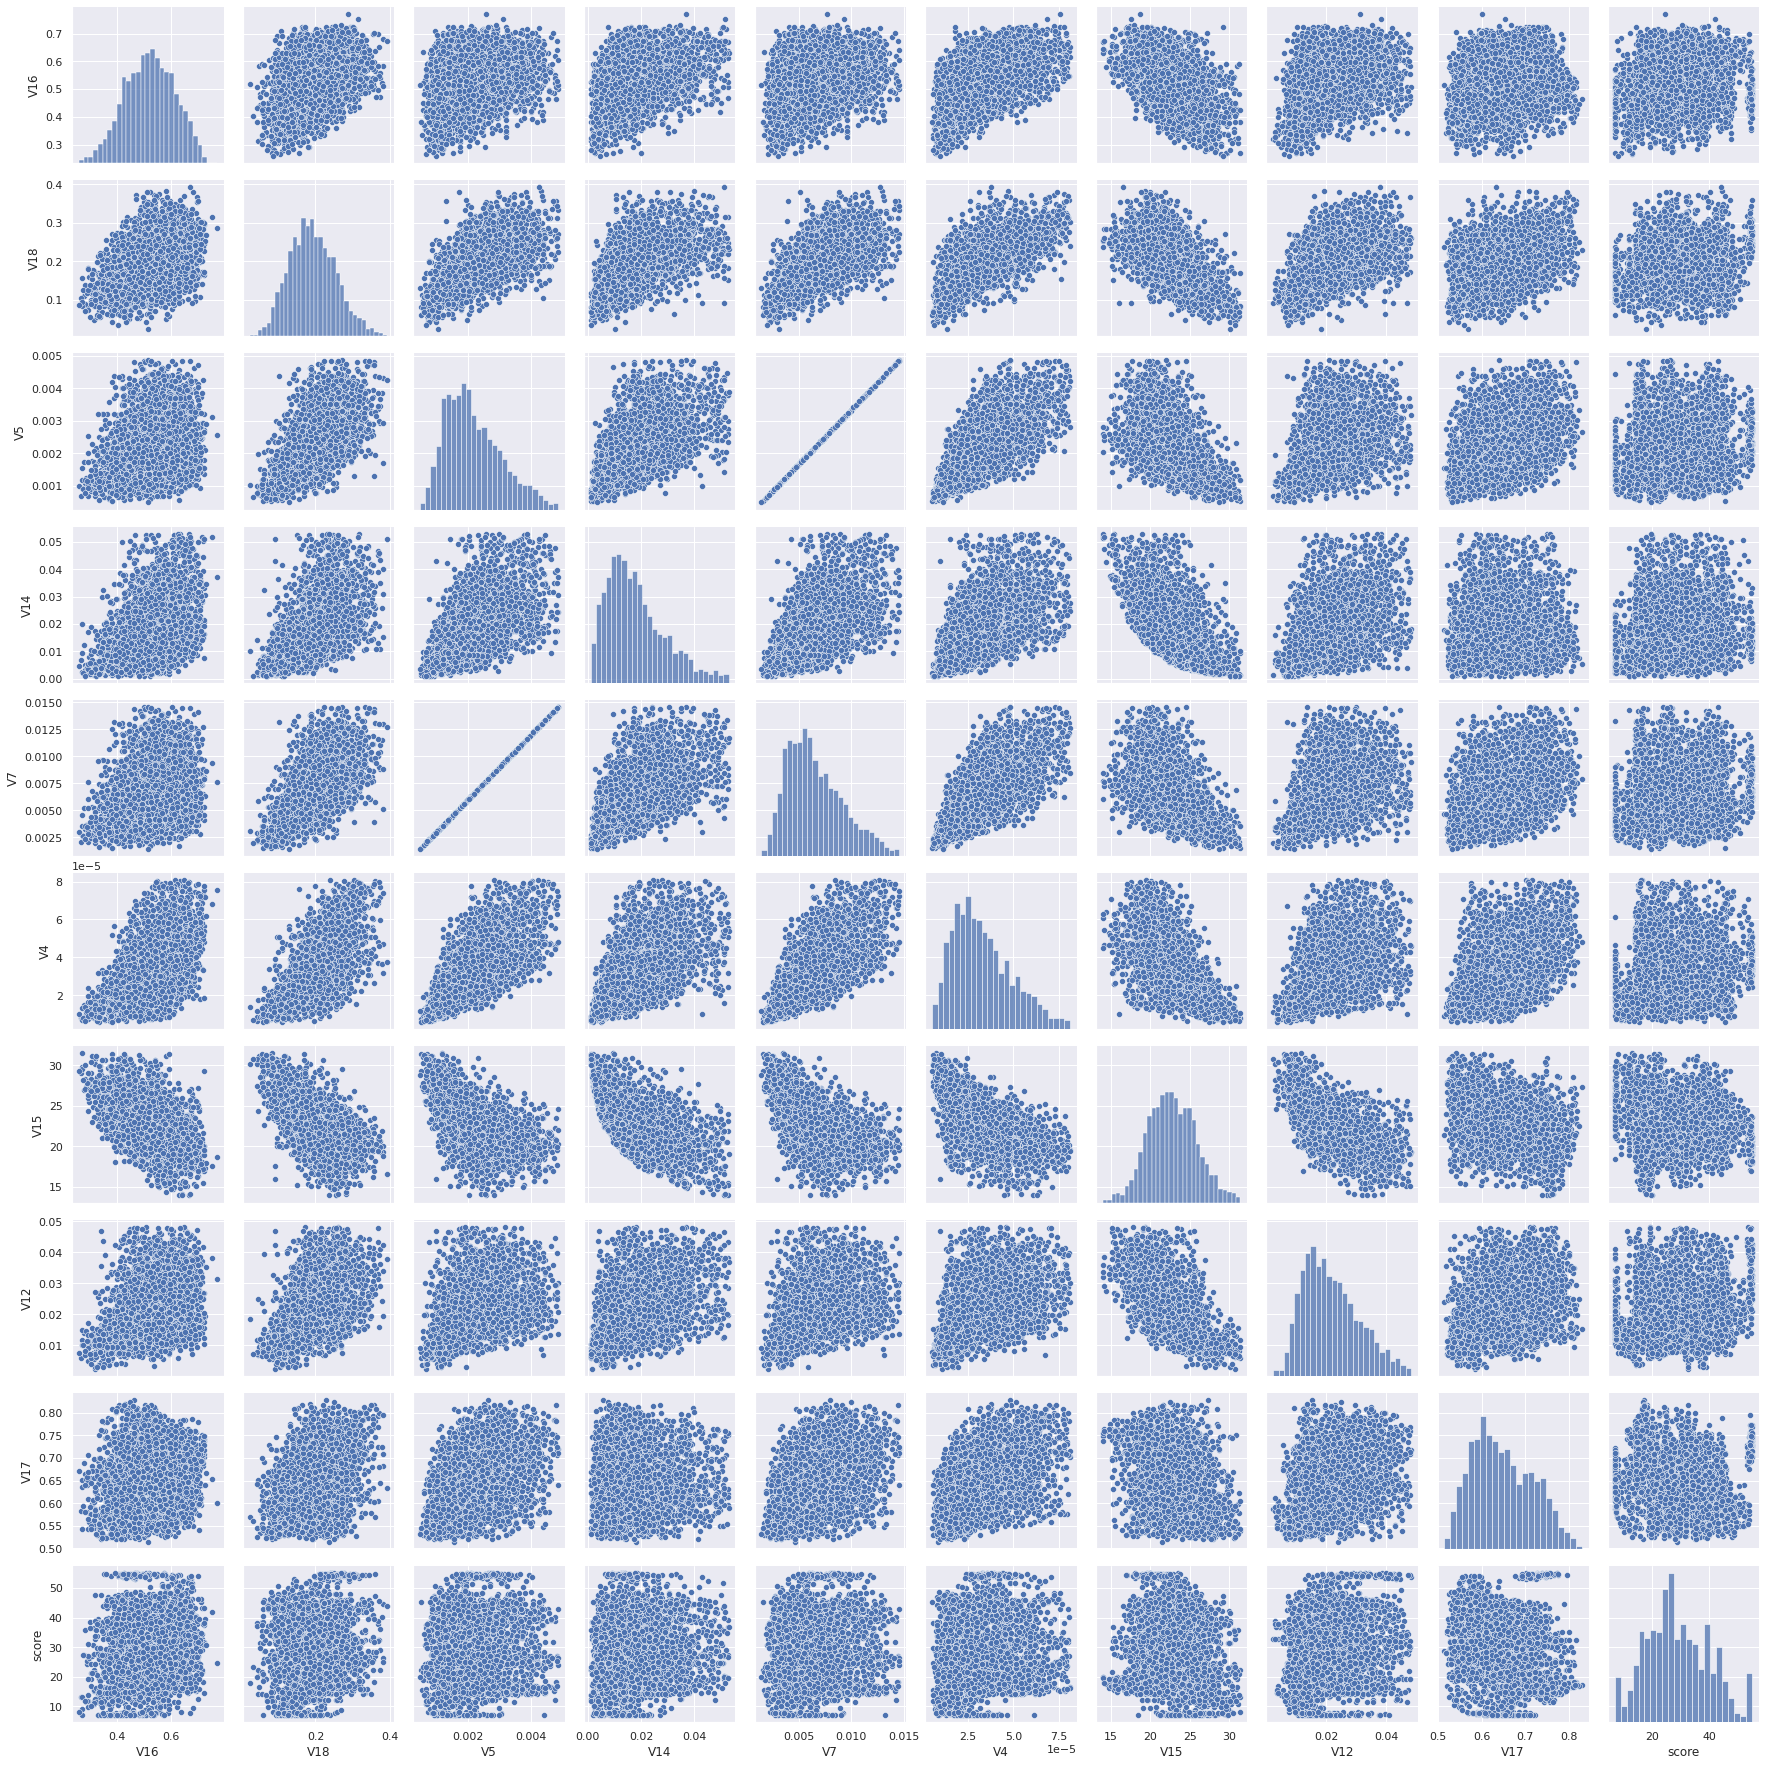

In [37]:
sns.pairplot(dados[(','.join(n_preditoras) + ',score').split(',')])
plt.show()

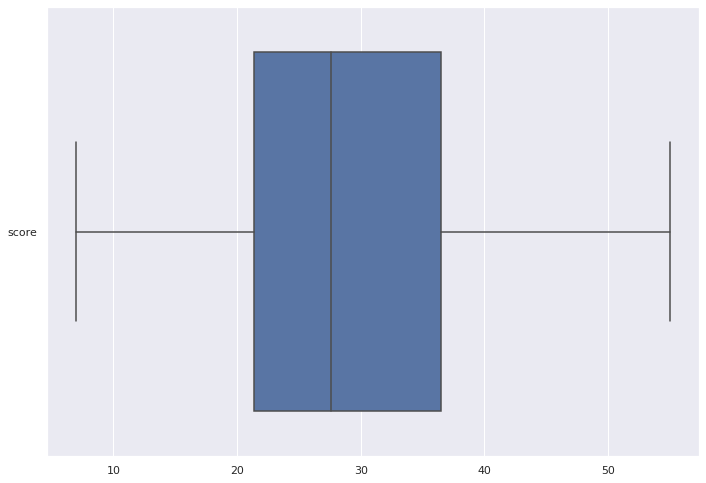

In [38]:
sns.boxplot(data=dfTrain[['score']], orient='h')


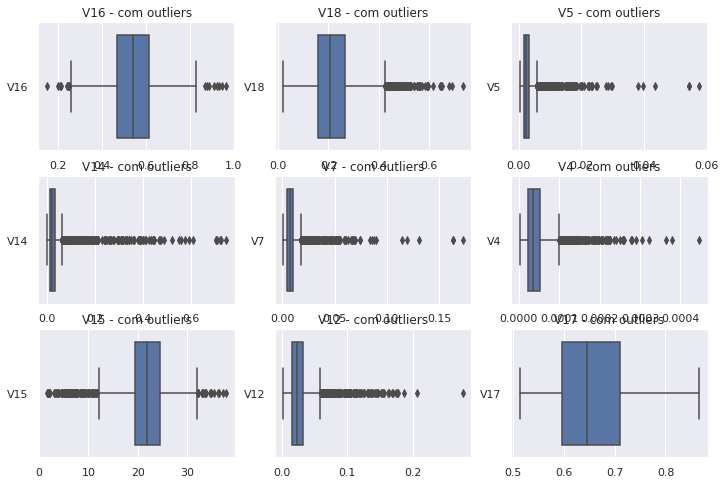

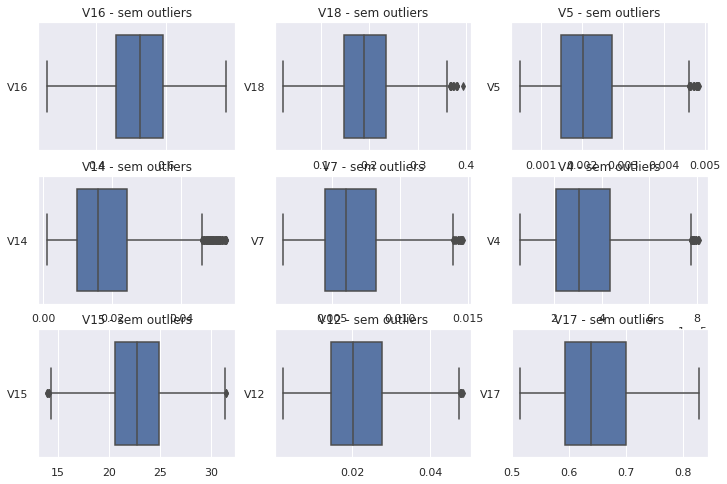

In [39]:
#box plot antes dos outliers
imprimeBoxPlot(dfTrain, n_preditoras, 'com outliers')
#box plot sem os outliers
imprimeBoxPlot(dados, n_preditoras, 'sem outliers')

In [40]:
n_preditoras

['V16', 'V18', 'V5', 'V14', 'V7', 'V4', 'V15', 'V12', 'V17']

(3329, 2)


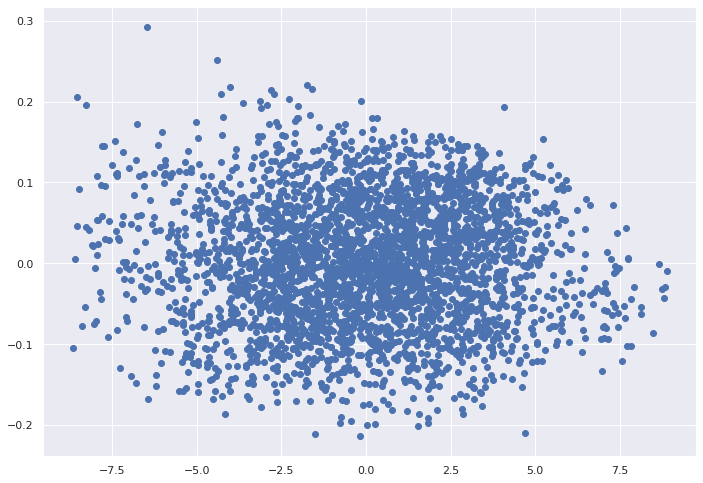

In [41]:
from sklearn.decomposition import PCA
###########
# projecting data in 2D
###########
X = dados[n_preditoras]
pca_proj=PCA(n_components=2)
data_2d=pca_proj.fit_transform(X)
print(data_2d.shape)

plt.scatter(data_2d[:,0],data_2d[:,1])


In [82]:
X = dados[n_preditoras]
y = dados['score']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [43]:
dados_t = pd.DataFrame(X_treino, columns=n_preditoras)
dados_t['score'] = y_treino

In [44]:
#Ajusta o modelo de regressão linear múltipla para o score

modelo = ols('score ~ ' + ' + '.join(n_preditoras) ,data=dados_t)

res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     37.13
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.56e-62
Time:                        22:50:38   Log-Likelihood:                -10001.
No. Observations:                2663   AIC:                         2.002e+04
Df Residuals:                    2653   BIC:                         2.008e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.6200      4.796     14.307      0.0

In [45]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#scaled_features = StandardScaler().fit_transform(dados)
#scaled_features = MinMaxScaler().fit_transform(dados)
#dados = pd.DataFrame(scaled_features, columns=dados.columns)

In [46]:
modelo = ols('score ~ ' + ' + '.join(n_preditoras) ,data=dados)

res = modelo.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     45.56
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           7.92e-78
Time:                        22:50:38   Log-Likelihood:                -12513.
No. Observations:                3329   AIC:                         2.505e+04
Df Residuals:                    3319   BIC:                         2.511e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.7329      4.324     14.508      0.0

Number of Estimators: 1 mse: 152.50280367445947
Number of Estimators: 11 mse: 89.3738926624024
Number of Estimators: 21 mse: 82.77814842671583
Number of Estimators: 31 mse: 81.79950355880187
Number of Estimators: 41 mse: 80.86552443346801
Number of Estimators: 51 mse: 79.98973436911291
Number of Estimators: 61 mse: 80.60909045448554
Number of Estimators: 71 mse: 80.08529237221569
Number of Estimators: 81 mse: 80.9858511127912
Number of Estimators: 91 mse: 79.55698698469755
Melhor n: 1  com R2: 152.50280367445947


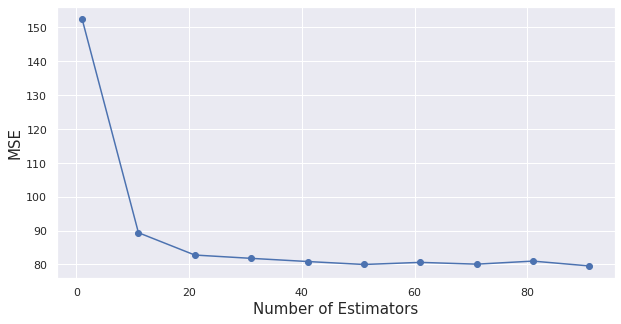

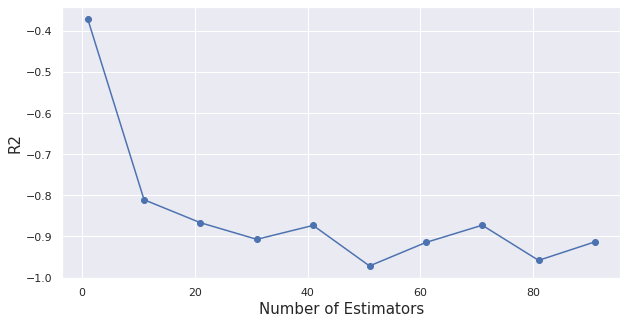

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_treino,y_treino)
    y_pred = model.predict(X_teste) 
    score = mean_squared_error(y_pred, y_teste)
    r2 = r2_score(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score)
    vscore.append(score)
    vn.append(n)
    vr2.append(r2)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com R2:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('R2', fontsize = 15)
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

linreg = LinearRegression()
linreg.fit(X_treino, y_treino)
y_pred_linreg = linreg.predict(X_teste)
r2_linreg = r2_score(y_teste, y_pred_linreg)
print('R2:',r2_linreg)
mse_linreg = mean_squared_error(y_teste, y_pred_linreg)
print('MSE:',mse_linreg)


R2: 0.09590629965991926
MSE: 111.2649747199926


In [49]:
from sklearn.preprocessing import PolynomialFeatures

# define a transformação nos dados
transformer = PolynomialFeatures(degree=4, include_bias=False)
#x = X_treino.reshape((-1, 1))
transformer.fit(X_treino)
#print('Dados originais:\n', X_treino)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(X_treino)
x_t = transformer.transform(X_teste)
#print('Novos dados:\n', x_[0:1])

In [50]:
model = LinearRegression().fit(x_, y_treino)
y_pred = model.predict(x_)

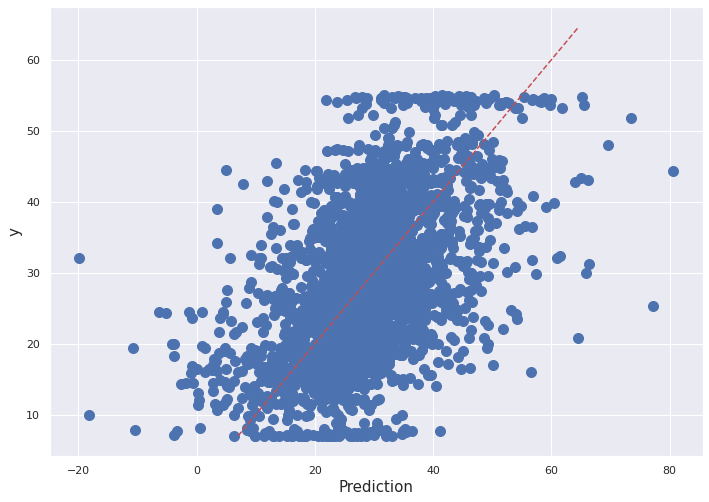

In [51]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_treino, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_treino), 1.2*max(y_treino),(max(y_treino)-min(y_treino))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

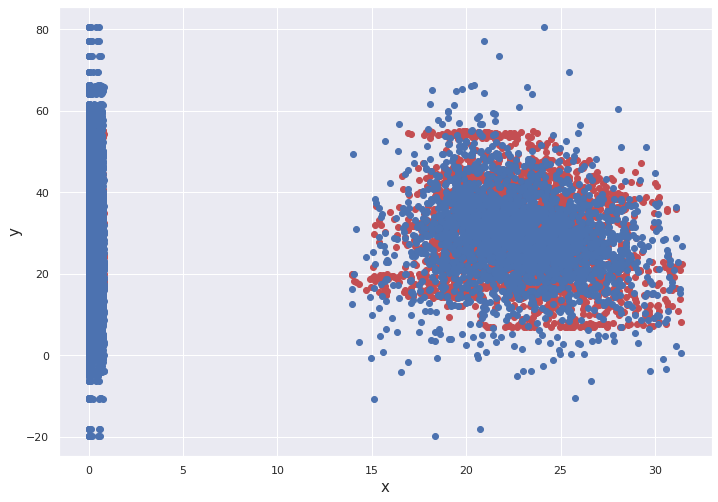

In [52]:
plt.plot(X_treino,y_treino, 'ro', label='Dados originais')
plt.plot(X_treino,y_pred, 'bo', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
#plt.legend()
plt.show(True)

In [53]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_t)
R2 = r2_score(y_teste, y_pred)
print('R2:', R2)
MSE = mean_squared_error(y_teste, y_pred)
print('MSE:', MSE)


R2: -0.9203107957725203
MSE: 236.32874785632006


grau2: r2=0.20 e mse=97.93<br>
grau3: r2=0.23 e mse=93.70<br>
grau5: r2=-0.67 e mse=206.64

In [65]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from numpy.random import seed
from tensorflow.random import set_seed
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.metrics import precision_score, recall_score

In [56]:
print(x_.shape, x_t.shape)
type(x_)

(2663, 714) (666, 714)


numpy.ndarray

In [120]:
def modelo_Denso(input_dim):
    '''modelo de autoenconder definido com as camadas solicitadas no comando da questão.'''
    input_data = keras.layers.Input(shape=(input_dim,))
    dropOut_1 = keras.layers.Dropout(0.25)(input_data) 
    bn_1 = keras.layers.BatchNormalization()(dropOut_1)
    dense1 = keras.layers.Dense(256, activation = 'relu')(bn_1)
    dense2 = keras.layers.Dense(2000, activation = 'relu')(dense1)
    dense3 = keras.layers.Dense(1, activation = 'linear')(dense2)
    model = keras.models.Model(input_data, dense3)
    model.summary()
    return model



In [121]:
X_ = X_treino.values
modelx = modelo_Denso(X_.shape[1])
modelx.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate= 0.001), metrics=['mse','mae'])
hist = modelx.fit(X_, y_treino,  epochs=50, batch_size=16, validation_split=0.05)

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 9)]               0         
                                                                 
 dropout_20 (Dropout)        (None, 9)                 0         
                                                                 
 batch_normalization_23 (Bat  (None, 9)                36        
 chNormalization)                                                
                                                                 
 dense_61 (Dense)            (None, 256)               2560      
                                                                 
 dense_62 (Dense)            (None, 2000)              514000    
                                                                 
 dense_63 (Dense)            (None, 1)                 2001      
                                                          

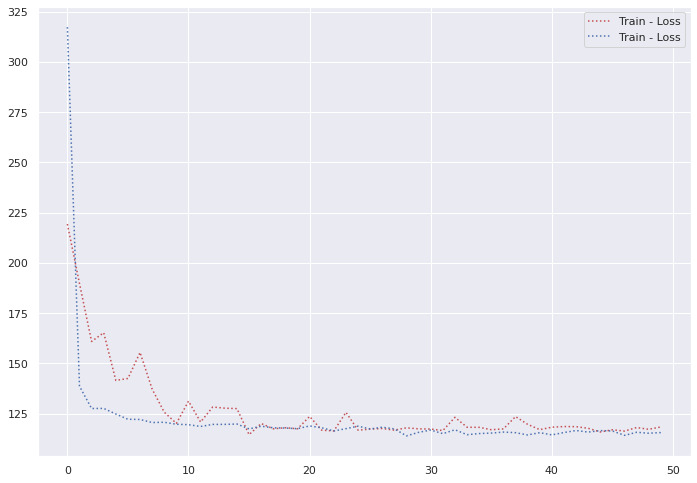

In [119]:
plt.plot(hist.history['val_loss'], ':r', label="Train - Loss")
plt.plot(hist.history['loss'], ':b', label="Train - Loss")
plt.legend()

In [104]:
del(model)